# **Prep: Outliers**

---



### **The Empirical Rule**

This uses the **normal distribution** or bell-curve to decide which points are outliers. Calculations include mean, standard deviation, and skewness.

In [1]:
import pandas as pd

df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df.head()

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0


In [2]:
# The Empirical Rule (68-95-99.7)

outliers = pd.DataFrame(columns=['min', 'count below', 'max', 'count above'])

# Loop through each column in the dataframe except those that are: 1) categorical, 2) empty, or 3) binary (0/1)
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
    # Calculate the theoretical min/max
    min = df[col].mean() - (df[col].std() * 3)
    max = df[col].mean() + (df[col].std() * 3)
    outliers.loc[col] = (min, df[col][df[col] < min].count(), max, df[col][df[col] > max].count())

# Let's take a look to make sure it works
outliers
    

,min,count below,max,count above
weight_kg,-266.686193,0.0,389.442403,14.0
hp,-10.769242,0.0,148.686845,11.0
attack,-18.618783,0.0,174.334139,4.0
defense,-19.298739,0.0,165.316217,8.0
speed,-20.388404,0.0,153.057567,2.0
generation,-2.100872,0.0,9.481646,0.0


Notice many of the above variables have multiple outliers to the right, not to the left. Compare this with the skew values below:

In [3]:
df.skew()      # Ignore is_legendary

C:\Users\jrw100\AppData\Local\Temp/ipykernel_7520/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


weight_kg       4.871044
hp              1.826591
attack          0.530811
defense         1.121058
speed           0.438918
generation      0.117207
is_legendary    2.927576
dtype: float64

Replace all outlier values with the theoretical max (one way to get rid of outliers). Notice that the skewness significantly decreases, but ask yourself: is this a good idea? Does it ultimately help your data? It all depends on your dataset.

In [5]:
# The Empirical Rule (68-95-99.7) with both identification and replacement
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

# Loop through each column in the dataframe
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
    min = df[col].mean() - (df[col].std() * 3)
    max = df[col].mean() + (df[col].std() * 3)

    # Once the min/max is calculated for a column, take an inner loop through the row values of each column to replace values
    for i, value in enumerate(df[col]): 
      if value < min:      
        df.at[i, col + '_3std'] = min   # replace with min
        df.at[i, 'outlier'] = 1         # identify the record as an outlier for future filtering
      elif value > max:    
        df.at[i, col + '_3std'] = max   # replace with max
        df.at[i, 'outlier'] = 1
      else:                
        df.at[i, col + '_3std'] = value # use original value
        df.at[i, 'outlier'] = 0
  
# I don't like binary variables like "outlier" becoming floats; cast it back to an int
if 'outlier' in df.columns:
  df = df.astype({"outlier": int})

# View the cleaned dataset:
df.sort_values(by='weight_kg', ascending=False)


,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary,weight_kg_3std,outlier,hp_3std,attack_3std,defense_3std,speed_3std,generation_3std
789,Cosmoem,psychic,NaN,999.9,43,29,131,37,7,1,389.442403,0,43.000000,29.000000,131.0,37.0,7.0
796,Celesteela,steel,flying,999.9,97,101,103,61,7,1,389.442403,0,97.000000,101.000000,103.0,61.0,7.0
382,Groudon,ground,NaN,950.0,100,180,160,90,3,1,389.442403,0,100.000000,174.334139,160.0,90.0,3.0
749,Mudsdale,ground,NaN,920.0,100,125,100,35,7,0,389.442403,0,100.000000,125.000000,100.0,35.0,7.0
798,Guzzlord,dark,dragon,888.0,223,101,53,43,7,1,389.442403,0,148.686845,101.000000,53.0,43.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Muk,poison,poison,NaN,105,105,75,50,1,0,NaN,0,105.000000,105.000000,75.0,50.0,1.0
102,Exeggutor,grass,psychic,NaN,95,105,85,45,1,0,NaN,0,95.000000,105.000000,85.0,45.0,1.0
104,Marowak,ground,fire,NaN,60,80,110,45,1,0,NaN,0,60.000000,80.000000,110.0,45.0,1.0
719,Hoopa,psychic,ghost,NaN,80,160,60,80,6,1,NaN,0,80.000000,160.000000,60.0,80.0,6.0


In [6]:
df.skew()

C:\Users\jrw100\AppData\Local\Temp/ipykernel_7520/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


weight_kg          4.871044
hp                 1.826591
attack             0.530811
defense            1.121058
speed              0.438918
generation         0.117207
is_legendary       2.927576
weight_kg_3std     2.490652
outlier            0.000000
hp_3std            0.768176
attack_3std        0.506759
defense_3std       0.727692
speed_3std         0.398063
generation_3std    0.117207
dtype: float64

### **Tukey Box Plot**

This uses the **Tukey Box Plot** to decide which values are outliers. Calculations use median and interquartile range. Refer to your book for further explanation and comparison with the normal distribution.

In [7]:
# Tukey Box Plot
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')

outliers = pd.DataFrame(columns=['min', 'count below', 'max', 'count above'])

for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
    
    # Calculate the theoretical min/max based on 1.5
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    min = q1 - (1.5 * (q3 - q1))
    max = q3 + (1.5 * (q3 - q1))
    
    outliers.loc[col] = (min, df[col][df[col] < min].count(), max, df[col][df[col] > max].count())

# Let's take a look
outliers

,min,count below,max,count above
weight_kg,-74.7,0.0,148.5,80.0
hp,5.0,1.0,125.0,21.0
attack,-12.5,0.0,167.5,5.0
defense,-10.0,0.0,150.0,11.0
speed,-15.0,0.0,145.0,6.0
generation,-2.5,0.0,9.5,0.0


Notice that the above min values are negative--and not possible for our dataset. This is due to the skewness of the variables. If outliers are removed, then this could change. 

Tukey still remains a better option for skewed data.

### **K-Means Cluster-Based Outlier Detection**

This method uses clustering techniques to judge outliers. However, there is no set "statistic" that states whether a value is an outlier or not. This is just a tool and can be used with the previous methods.

In [8]:
import pandas as pd, numpy as np

df = pd.read_csv('http://www.ishelp.info/data/crime_report_clean.csv')
df.head()

,report_ID,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies
0,1,1975,NM00101,"Albuquerque, NM",286238,2383,30,181,1353,819
1,2,1975,TX22001,"Arlington, TX",112478,278,5,28,132,113
2,3,1975,GAAPD00,"Atlanta, GA",490584,8033,185,443,3518,3887
3,4,1975,CO00101,"Aurora, CO",116656,611,7,44,389,171
4,5,1975,TX22701,"Austin, TX",300400,1215,33,190,463,529


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# This object will standardize the values to the same scale which is necessary for kmeans clustering
ss = StandardScaler() 
# To identify outliers based on all features, add the rest to the lists below:
df = pd.DataFrame(ss.fit_transform(df[['homicides', 'population']]), columns=['homicides', 'population'])

5 clusters is a choice. You could do 4 or 6 or more/less.

In [10]:
num_clusters = 5
cluster_model = KMeans(num_clusters)
model = cluster_model.fit(df)

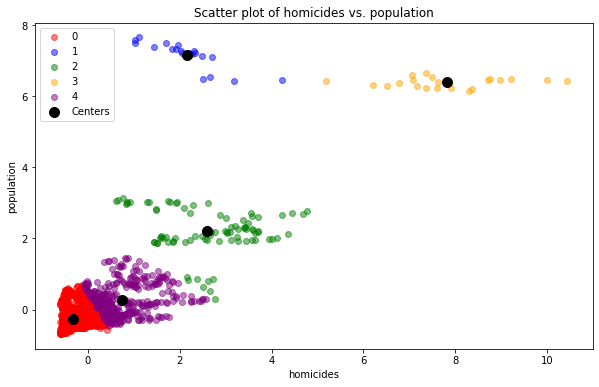

In [11]:
import matplotlib.pyplot as plt

colors=["red","blue","green","orange","purple"]

# Plot the clusters
plt.figure(figsize=(10,6))
for i in range(0, num_clusters):
  plt.scatter(df[model.labels_==i][df.columns[0]], df[model.labels_==i][df.columns[1]], label=i, c=colors[i], alpha=0.5)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title(f'Scatter plot of {df.columns[0]} vs. {df.columns[1]}')
plt.legend()
plt.show()

THIS IS DIFFERENT FROM YOUR BOOK. Notice we are calculating clusters on homicide vs. population. *Are there any cities that have particularly high/low homicides based on their population level?* The visual above gives a nice representation, but notice that no values are automatically designated "outlier"--that has to be your judgment.

In [13]:
def distance_from_center(x, y, label):
  center_x =  model.cluster_centers_[label,0] # Get the center coordinates
  center_y =  model.cluster_centers_[label,1]
  distance = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
  return np.round(distance, 3)

# We create a new single column containing the distances of each row from their cluster centers
df['distance'] = distance_from_center(df[df.columns[0]], df[df.columns[1]], model.labels_)
df

,homicides,population,distance
0,-0.467063,-0.503475,0.290
1,-0.590139,-0.674937,0.501
2,0.296011,-0.301830,0.616
3,-0.580293,-0.670815,0.492
4,-0.452294,-0.489500,0.271
...,...,...,...
2748,-0.462140,-0.263256,0.145
2749,-0.343987,-0.389717,0.138
2750,-0.521217,-0.339118,0.220
2751,0.182781,-0.122588,0.518


Notice the Distances calculated above, which are the distances of each point from the center of the cluster. This can be used to judge which values may be outliers and can be used with Tukey/Empirical tools.

The histogram also helps to distinguish values with the highest distance from their centers. For example, values of Distance around 2.5 can be investigated as outliers.

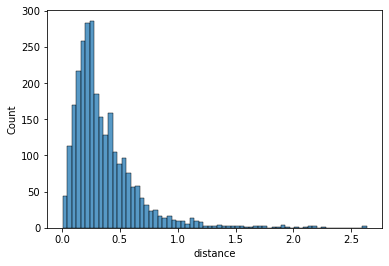

In [14]:
import seaborn as sns

sns.histplot(df.distance);

# **Practice Problems**

---



In [ ]:
# Theoretical Max/Min Function
def get_outlier_minmax(col):
  if pd.api.types.is_numeric_dtype(col):
    if col.skew() > 1 or col.skew() < -1:
      q1 = col.quantile(.25)
      q3 = col.quantile(.75)
      min = q1 - (1.5 * (q3 - q1))
      max = q3 + (1.5 * (q3 - q1))
      theory = 'Tukey 1.5IQR'
    else:
      min = col.mean() - (col.std() * 3)
      max = col.mean() + (col.std() * 3)
      theory = '3 σ from μ'
    min_count = (col < min).sum()
    max_count = (col > max).sum()
  else:
    min = col.min()
    max = col.max()
    min_count = (col == col.min()).sum()
    max_count = (col == col.max()).sum()
    theory = "Categorical"
  
  return min, min_count, max, max_count, theory


# Test it out
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
print(get_outlier_minmax(df['name']))  # Check if the error checking on categorical values works
min, min_count, max, max_count, theory = get_outlier_minmax(df['weight_kg']) # Test with a numeric column; store the three values returned
print(min)
print(min_count)
print(max)
print(max_count)
print(theory)

('Abomasnow', 1, 'Zygarde', 1, 'Categorical')
-74.69999999999999
0
148.5
80
Tukey 1.5IQR


In [ ]:
# Outlier Summary Function

# Add this to your my_functions.py file
def detect_outliers(df, method='auto'):
  import pandas as pd

  summary_table = pd.DataFrame(columns=['total values', 'outlier min', 'count below', 'outlier max', 'count above', 'method'])

  # Loop through each column in the dataframe that is numeric, not binary, and not empty
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
      # Get the min, max and theory
      min, min_count, max, max_count, theory = get_outlier_minmax(df[col])
      # Place them in a summary df as well as a count of the outliers above and below the range; also report the theory used
      summary_table.loc[col] = (df[col].count(), min, min_count, max, max_count, theory)
  return summary_table

# Test it out:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
detect_outliers(df)

,total values,outlier min,count below,outlier max,count above,method
weight_kg,781,-74.700000,0,148.500000,80,Tukey 1.5IQR
hp,801,5.000000,1,125.000000,21,Tukey 1.5IQR
attack,801,-18.618783,0,174.334139,4,3 σ from μ
defense,801,-10.000000,0,150.000000,11,Tukey 1.5IQR
speed,801,-20.388404,0,153.057567,2,3 σ from μ
generation,801,-2.100872,0,9.481646,0,3 σ from μ


In [ ]:
def clean_outliers(df):
  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]) and (len(df[col].value_counts()) > 0) and not all(df[col].value_counts().index.isin([0, 1])):
      # Calculate the theoretical max and min threshold for outliers
      if df[col].skew() < -1 or df[col].skew() > 1:
        min = df[col].quantile(.25) - (1.5 * (df[col].quantile(.75) - df[col].quantile(.25)))
        max = df[col].quantile(.75) + (1.5 * (df[col].quantile(.75) - df[col].quantile(.25)))
      else:
        min = df[col].mean() - (df[col].std() * 3)
        max = df[col].mean() + (df[col].std() * 3)

      # Check to see if there are any outliers for this column
      if len(df[df[col] < min]) > 0 or len(df[df[col] > max]) > 0:
        df.loc[df[col] < min, col] = min  # Change all values below min to min
        df.loc[df[col] > max, col] = max  # Change all values above max to max
      else:
        continue  # If there are no outliers, skip to the next column
      
  return df

# Test it out:
import pandas as pd
df = pd.read_csv('http://www.ishelp.info/data/pokemon.csv')
df_output = pd.DataFrame({'Skew Before':df.skew()})
df_output['Skew After'] = clean_outliers(df).skew()
df_output

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Skew Before,Skew After
weight_kg,4.871044,1.161925
hp,1.826591,0.461791
attack,0.530811,0.506759
defense,1.121058,0.625067
speed,0.438918,0.398063
generation,0.117207,0.117207
is_legendary,2.927576,2.927576


Notice that skewness markedly improves for every feature except for generation and is_legendary because those are 0/1 binary features and get ignored in the function above 